In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:04<00:00, 274MB/s]
100% 1.06G/1.06G [00:04<00:00, 242MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [5]:
#genrators
#works on batches for process large datas
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#normalize to 1 and 0
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [7]:
#cnn model
#3 conv layer(filter-32,64,128)
#3 fully connected layer(128 neuron,64 neuron,1 neuron)
#act func=relu
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))





In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 65s 90ms/step - loss: 0.5992 - accuracy: 0.6769 - val_loss: 0.5343 - val_accuracy: 0.7324
Epoch 2/10
625/625 [==============================] - 54s 85ms/step - loss: 0.4836 - accuracy: 0.7636 - val_loss: 0.4452 - val_accuracy: 0.7954
Epoch 3/10
625/625 [==============================] - 57s 90ms/step - loss: 0.3792 - accuracy: 0.8286 - val_loss: 0.4724 - val_accuracy: 0.7984
Epoch 4/10
625/625 [==============================] - 53s 85ms/step - loss: 0.2560 - accuracy: 0.8924 - val_loss: 0.6589 - val_accuracy: 0.7714
Epoch 5/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1532 - accuracy: 0.9388 - val_loss: 0.7425 - val_accuracy: 0.7932
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0916 - accuracy: 0.9667 - val_loss: 1.0177 - val_accuracy: 0.7860
Epoch 7/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0646 - accuracy: 0.9768 - val_loss: 1.0048 - val_accuracy:

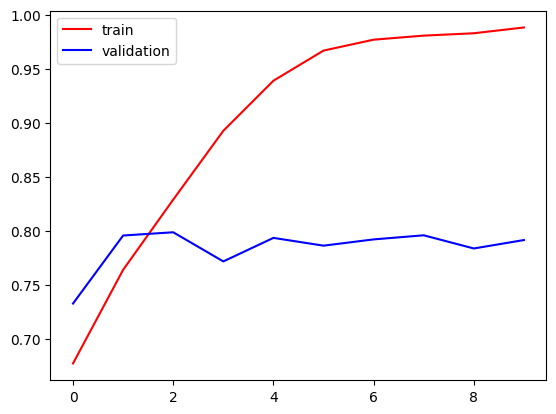

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

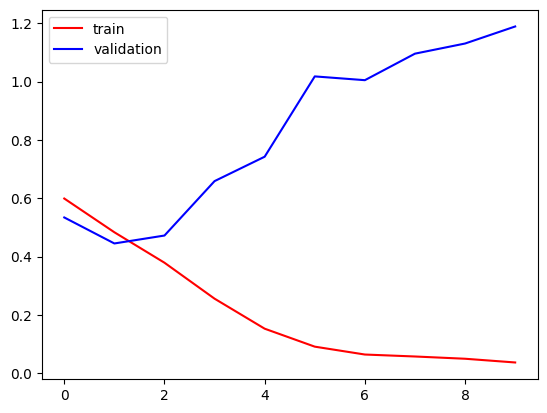

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
import cv2

In [21]:
test_img=cv2.imread('/content/cat.jpg')

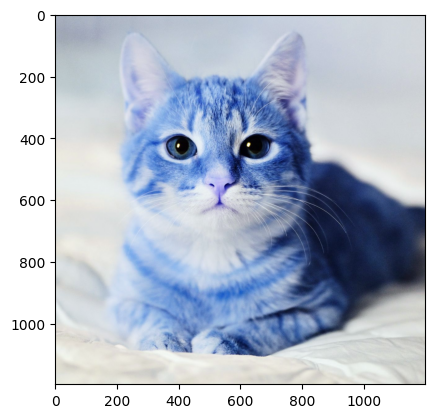

In [22]:
plt.imshow(test_img)

In [23]:
test_img.shape

(1197, 1200, 3)

In [24]:
test_img=cv2.resize(test_img,(256,256))

In [25]:
test_input=test_img.reshape((1,256,256,3))

In [26]:
model.predict(test_input)

1/1 [==============================] - 0s 23ms/step


array([[0.]], dtype=float32)